#### Priya Bannur | 1032170692
Deep Learning Lab 4

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import mean_squared_error

###### Helper Functions

In [2]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

###### Data Preprocessing

In [3]:
dataset = pd.read_csv('Stock_dataset.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


In [4]:
# Checking for missing values
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

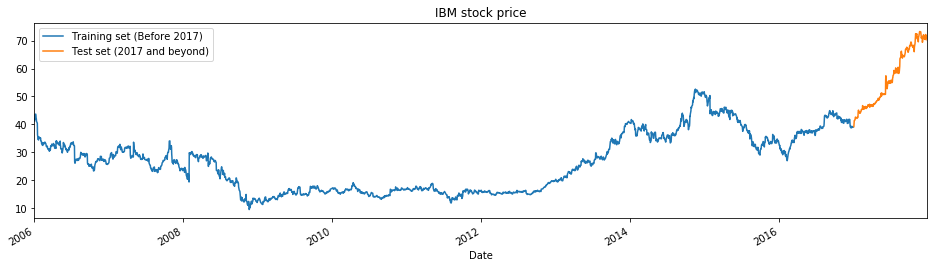

In [5]:
# We have chosen 'High' attribute for prices.
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [6]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
len(training_set_scaled)

2768

In [8]:
# data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60,2768):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [10]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# 'High' attribute data for processing
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [11]:
Xtest = []
ytest = []
for i in range(60,311):
    Xtest.append(inputs[i-60:i,0])
    ytest.append(inputs[i,0])
Xtest, ytest = np.array(Xtest), np.array(ytest)
Xtest = np.reshape(Xtest, (Xtest.shape[0],Xtest.shape[1],1))

###### Model Building

In [12]:
# The LSTM architecture
model = Sequential()
# First LSTM layer with Dropout regularisation
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

##### Model Training

In [14]:
# Compiling the RNN
model.compile(optimizer='adam',loss='mean_squared_error')
# Fitting to the training set
history=model.fit(X_train,y_train, epochs=50, batch_size=32)

Epoch 1/50
85/85 [==============================] - 10s 120ms/step - loss: 0.0123
Epoch 2/50
85/85 [==============================] - 10s 113ms/step - loss: 0.0036
Epoch 3/50
85/85 [==============================] - 10s 117ms/step - loss: 0.0035
Epoch 4/50
85/85 [==============================] - 10s 119ms/step - loss: 0.0031
Epoch 5/50
85/85 [==============================] - 10s 112ms/step - loss: 0.0030
Epoch 6/50
85/85 [==============================] - 10s 114ms/step - loss: 0.0031
Epoch 7/50
85/85 [==============================] - 10s 121ms/step - loss: 0.0027
Epoch 8/50
85/85 [==============================] - 10s 118ms/step - loss: 0.0024
Epoch 9/50
85/85 [==============================] - 11s 124ms/step - loss: 0.0025
Epoch 10/50
85/85 [==============================] - 10s 117ms/step - loss: 0.0024
Epoch 11/50
85/85 [==============================] - 12s 143ms/step - loss: 0.00230s - loss:
Epoch 12/50
85/85 [==============================] - 13s 159ms/step - loss: 0.00200s -

##### Model Prediction

In [15]:
# Predicting the prices
predicted_stock_price = model.predict(Xtest)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

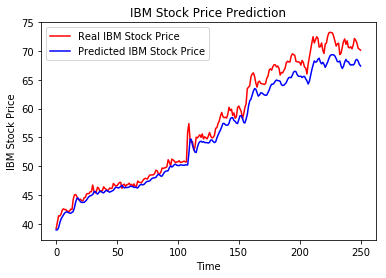

In [16]:
# Visualizing the results for LSTM
plot_predictions(test_set,predicted_stock_price)

##### Model Performance

In [17]:
# Evaluating our model
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 2.101219692841963.
